##Energy Consumption


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Energy_consumption=pd.read_csv("Energy consumption.csv")

In [3]:
E_C=pd.DataFrame(Energy_consumption)

In [4]:
E_C

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


In [5]:
E_C.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [6]:
E_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [7]:
E_C['Building Type'].value_counts()

Building Type
Residential    347
Commercial     336
Industrial     317
Name: count, dtype: int64

In [8]:
E_C['Day of Week'].value_counts()

Day of Week
Weekday    507
Weekend    493
Name: count, dtype: int64

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler


In [10]:
nominal_features=['Building Type','Day of Week']
numerical_val=['Square Footage','Number of Occupants','Appliances Used']

In [11]:
preprosser=ColumnTransformer(
    transformers=[
        ('ohe',OneHotEncoder(handle_unknown='ignore'),nominal_features),
        ('numeric',StandardScaler(),numerical_val)
    ]
)

In [12]:
preprosser

ColumnTransformer(transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'),
                                 ['Building Type', 'Day of Week']),
                                ('numeric', StandardScaler(),
                                 ['Square Footage', 'Number of Occupants',
                                  'Appliances Used'])])

In [13]:
E_C

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


In [14]:
df_selcted=E_C[['Square Footage','Number of Occupants','Appliances Used','Average Temperature','Energy Consumption']]

In [15]:
correlation_matrix=df_selcted.corr()
correlation_matrix

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
Square Footage,1.000000,0.033379,-0.013478,0.027273,0.774873
Number of Occupants,0.033379,1.000000,0.023646,0.014122,0.354485
Appliances Used,-0.013478,0.023646,1.000000,-0.062870,0.312792
Average Temperature,0.027273,0.014122,-0.062870,1.000000,-0.034487
Energy Consumption,0.774873,0.354485,0.312792,-0.034487,1.000000


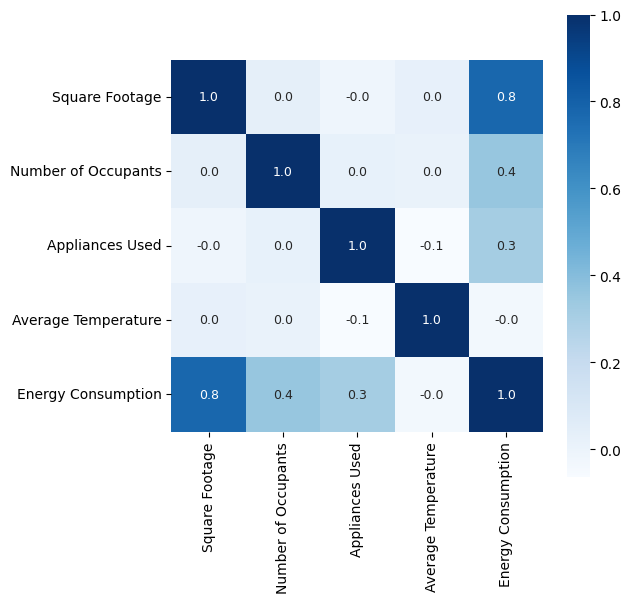

In [16]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':9},cmap='Blues')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X=E_C.drop(columns=['Average Temperature','Energy Consumption'])
y=E_C['Energy Consumption']

In [19]:
X

,Building Type,Square Footage,Number of Occupants,Appliances Used,Day of Week
0,Residential,7063,76,10,Weekday
1,Commercial,44372,66,45,Weekday
2,Industrial,19255,37,17,Weekend
3,Residential,13265,14,41,Weekday
4,Commercial,13375,26,18,Weekday
...,...,...,...,...,...
995,Residential,14419,68,44,Weekend
996,Industrial,12194,7,22,Weekend
997,Commercial,39562,88,20,Weekday
998,Residential,8348,67,37,Weekend


In [20]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(800, 5) (200, 5) (800,) (200,)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipeline=Pipeline(steps=[
    ('preproscer',preprosser),
    ('regressor',LinearRegression())
])

In [23]:
pipeline

Pipeline(steps=[('preproscer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Building Type',
                                                   'Day of Week']),
                                                 ('numeric', StandardScaler(),
                                                  ['Square Footage',
                                                   'Number of Occupants',
                                                   'Appliances Used'])])),
                ('regressor', LinearRegression())])

In [24]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preproscer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Building Type',
                                                   'Day of Week']),
                                                 ('numeric', StandardScaler(),
                                                  ['Square Footage',
                                                   'Number of Occupants',
                                                   'Appliances Used'])])),
                ('regressor', LinearRegression())])

In [25]:
X_test['Energy Consumption']=y_test


In [26]:
X_test['predictions']=pipeline.predict(X_test)

In [27]:
X_test

,Building Type,Square Footage,Number of Occupants,Appliances Used,Day of Week,Energy Consumption,predictions
521,Commercial,40192,23,23,Weekend,4549.59,4587.0
737,Residential,8406,25,36,Weekday,2842.91,2828.0
740,Industrial,47719,92,7,Weekend,5781.83,5833.0
660,Commercial,37435,26,35,Weekday,4773.54,4768.0
411,Commercial,11331,47,43,Weekend,3791.04,3785.5
...,...,...,...,...,...,...,...
408,Residential,2490,91,8,Weekday,2619.36,2627.5
332,Residential,23390,50,23,Weekend,3510.52,3517.5
208,Commercial,3593,88,41,Weekend,3768.30,3767.0
613,Residential,40787,35,4,Weekday,3949.40,3903.0


In [28]:
X_test['Actual_Error'] = X_test['Energy Consumption'] - X_test['predictions']
X_test['Absolute_Actual_Error'] = abs(X_test['Actual_Error'])
X_test['Absolute_Percentage_Error'] = X_test['Absolute_Actual_Error'] / X_test['Energy Consumption']

In [29]:
reg=X_test['Absolute_Percentage_Error'].mean()

In [48]:
reg

0.007627424817266614

In [30]:
X_test

,Building Type,Square Footage,Number of Occupants,Appliances Used,Day of Week,Energy Consumption,predictions,Actual_Error,Absolute_Actual_Error,Absolute_Percentage_Error
521,Commercial,40192,23,23,Weekend,4549.59,4587.0,-37.41,37.41,0.008223
737,Residential,8406,25,36,Weekday,2842.91,2828.0,14.91,14.91,0.005245
740,Industrial,47719,92,7,Weekend,5781.83,5833.0,-51.17,51.17,0.008850
660,Commercial,37435,26,35,Weekday,4773.54,4768.0,5.54,5.54,0.001161
411,Commercial,11331,47,43,Weekend,3791.04,3785.5,5.54,5.54,0.001461
...,...,...,...,...,...,...,...,...,...,...
408,Residential,2490,91,8,Weekday,2619.36,2627.5,-8.14,8.14,0.003108
332,Residential,23390,50,23,Weekend,3510.52,3517.5,-6.98,6.98,0.001988
208,Commercial,3593,88,41,Weekend,3768.30,3767.0,1.30,1.30,0.000345
613,Residential,40787,35,4,Weekday,3949.40,3903.0,46.40,46.40,0.011749


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [32]:
ran_pipeline=Pipeline(steps=[
    ('pre',preprosser),
    ('rad',RandomForestRegressor())
])

In [33]:
# Gradient Boosting
gb_model = Pipeline(steps=[
    ("preprocessor", preprosser),
    ("regressor", GradientBoostingRegressor(n_estimators=100, random_state=42))
])


In [34]:
# Decision Tree
dt_model = Pipeline(steps=[
    ("preprocessor", preprosser),
    ("regressor", DecisionTreeRegressor(random_state=42))
])


In [35]:
# AdaBoost
ab_model = Pipeline(steps=[
    ("preprocessor", preprosser),
    ("regressor", AdaBoostRegressor(n_estimators=100, random_state=42))
])


In [36]:
# XGBoost
xgb_model = Pipeline(steps=[
    ("preprocessor", preprosser),
    ("regressor", XGBRegressor(n_estimators=100, random_state=42))
])


In [37]:
# LightGBM (faster boosting, needs lightgbm installed)
lgbm_model = Pipeline(steps=[
    ("preprocessor", preprosser),
    ("regressor", LGBMRegressor(n_estimators=100, random_state=42))
])


In [38]:
ran_pipeline.fit(X_train,y_train)
X_test['Energy Consumption']=y_test
X_test['predictions']=ran_pipeline.predict(X_test)
X_test
X_test['Actual_Error'] = X_test['Energy Consumption'] - X_test['predictions']
X_test['Absolute_Actual_Error'] = abs(X_test['Actual_Error'])
X_test['Absolute_Percentage_Error'] = X_test['Absolute_Actual_Error'] / X_test['Energy Consumption']
ran=X_test['Absolute_Percentage_Error'].mean()

In [39]:
gb_model.fit(X_train,y_train)
X_test['Energy Consumption']=y_test
X_test['predictions']=gb_model.predict(X_test)
X_test
X_test['Actual_Error'] = X_test['Energy Consumption'] - X_test['predictions']
X_test['Absolute_Actual_Error'] = abs(X_test['Actual_Error'])
X_test['Absolute_Percentage_Error'] = X_test['Absolute_Actual_Error'] / X_test['Energy Consumption']
gb=X_test['Absolute_Percentage_Error'].mean()

In [40]:
dt_model.fit(X_train,y_train)
X_test['Energy Consumption']=y_test
X_test['predictions']=dt_model.predict(X_test)
X_test
X_test['Actual_Error'] = X_test['Energy Consumption'] - X_test['predictions']
X_test['Absolute_Actual_Error'] = abs(X_test['Actual_Error'])
X_test['Absolute_Percentage_Error'] = X_test['Absolute_Actual_Error'] / X_test['Energy Consumption']
dt=X_test['Absolute_Percentage_Error'].mean()

In [41]:
ab_model.fit(X_train,y_train)
X_test['Energy Consumption']=y_test
X_test['predictions']=ab_model.predict(X_test)
X_test
X_test['Actual_Error'] = X_test['Energy Consumption'] - X_test['predictions']
X_test['Absolute_Actual_Error'] = abs(X_test['Actual_Error'])
X_test['Absolute_Percentage_Error'] = X_test['Absolute_Actual_Error'] / X_test['Energy Consumption']
ada=X_test['Absolute_Percentage_Error'].mean()


In [42]:
xgb_model.fit(X_train,y_train)
X_test['Energy Consumption']=y_test
X_test['predictions']=xgb_model.predict(X_test)
X_test
X_test['Actual_Error'] = X_test['Energy Consumption'] - X_test['predictions']
X_test['Absolute_Actual_Error'] = abs(X_test['Actual_Error'])
X_test['Absolute_Percentage_Error'] = X_test['Absolute_Actual_Error'] / X_test['Energy Consumption']
xgm=X_test['Absolute_Percentage_Error'].mean()


In [43]:
lgbm_model.fit(X_train,y_train)
X_test['Energy Consumption']=y_test
X_test['predictions']=lgbm_model.predict(X_test)
X_test
X_test['Actual_Error'] = X_test['Energy Consumption'] - X_test['predictions']
X_test['Absolute_Actual_Error'] = abs(X_test['Actual_Error'])
X_test['Absolute_Percentage_Error'] = X_test['Absolute_Actual_Error'] / X_test['Energy Consumption']
lgm=X_test['Absolute_Percentage_Error'].mean()



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] Start training from score 4147.958360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [44]:
print('RandomForestRegressor:',ran)
print('gradian boost:',gb)
print('AdaBoostRegressor:',ada)
print('decision Tree',dt)
print('xgm',xgm)
print('lgm',lgm)
print('reg:',reg)

RandomForestRegressor: 0.022932880457745795
gradian boost: 0.019487815340553726
AdaBoostRegressor: 0.05128770231744065
decision Tree 0.04177735608546401
xgm 0.020146528463093352
lgm 0.019089536894671643
reg: 0.007627424817266614


In [45]:
import pickle


In [46]:
import pickle

with open("regression.pkl", "wb") as file:
    pickle.dump(pipeline, file)

In [47]:
with open(r"R:\ML PROJECTS\Energy_Consumation\regression.pkl", "rb") as f:
    pipeline = pickle.load(f)

print(pipeline.predict(X_test))

[4587.  2828.  5833.  4768.  3785.5 2464.5 4997.  3332.  5134.5 4277.5
 3052.  3860.  5371.  4681.  4675.5 3611.  3510.5 5136.5 4557.5 5305.
 4041.5 5021.5 4308.  3401.  2518.5 3761.5 3749.  2650.5 5332.  4762.5
 4835.5 4364.  4023.  6000.  3974.5 5508.  3892.5 3968.  3510.5 4921.5
 3756.  2706.5 4339.  4879.  5269.5 4257.  3442.5 4726.  2316.5 4876.
 4575.5 5309.5 5907.  5691.  3951.  4181.  4455.  4260.5 2563.  4516.
 2294.  2463.5 2403.  4351.5 4941.5 3631.  3579.  4416.5 6156.  2800.
 4225.  3600.  5107.  4753.  3972.  4913.  4460.5 5046.  2555.5 4752.5
 4351.5 3423.  3795.5 4700.  3663.  4175.  3216.5 4702.5 5269.  4284.5
 3646.5 3544.  5420.5 3970.5 2970.5 4302.5 4482.  2459.5 2979.5 4821.
 4262.  4834.5 2715.  5043.  3945.  4643.  3480.  4255.  4269.  4486.
 3914.  5449.5 5261.  5090.5 4802.5 3995.5 5779.  5389.5 4095.  3334.5
 5288.  3321.  3853.  3418.  4544.  4118.  4072.  4927.5 3332.  4890.
 3502.5 4063.5 2137.5 3670.5 4884.5 5528.  6062.5 4583.5 4858.5 2442.
 6447.  5392.5